In [7]:
import tensorflow as tf
import numpy as np
import os
import distutils
import matplotlib.pyplot as plt
from keras.models import Model

from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.python.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = np.float32(x_train/255).reshape(x_train.shape[0],-1)
x_test = np.float32(x_test/255).reshape(x_test.shape[0],-1)

# Convert y to one-hot
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

170508288/170498071 [==============================] - 12s 0us/step


In [24]:
print(x_train.shape)

(50000, 3072)


In [11]:
def plot_results(all_history):
  loss, val_loss, accuracy, val_accuracy = [], [], [], []
  for history in all_history:
    loss += history.history['loss']
    val_loss += history.history['val_loss']
    accuracy += history.history['accuracy']
    val_accuracy += history.history['val_accuracy']

  fig, ax = plt.subplots()
  ax.plot(accuracy,label = 'train')
  ax.plot(val_accuracy,label = 'test')
  ax.set_title('Accuracy')
  ax.legend(loc='lower right')
  fig, ax = plt.subplots()
  ax.plot(loss,label = 'train')
  ax.plot(val_loss,label = 'test')
  ax.set_title('Loss')
  ax.legend(loc='upper right')

In [3]:
def dense_model(inputs = 784,hidden_1=500, hidden_2=500):
  model = tf.keras.models.Sequential()
  model.add(Dense(hidden_1, input_shape=(inputs,), activation='relu'))
  model.add(Dense(hidden_2, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

In [7]:
opt = opt = tf.keras.optimizers.Adam(learning_rate=0.1)
dense_network = dense_model(inputs = x_train.shape[1])
dense_network.summary() 
dense_network.compile(loss="categorical_crossentropy", metrics=["accuracy"])
all_history = []

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               1536500   
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
Total params: 1,792,010
Trainable params: 1,792,010
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
196/196 [==============================] - 2s 11ms/step - loss: 0.9030 - accuracy: 0.6767 - val_loss: 1.8137 - val_accuracy: 0.4802
Epoch 2/20
196/196 [==============================] - 2s 10ms/step - loss: 0.8942 - accuracy: 0.6788 - val_loss: 1.6769 - val_accuracy: 0.5025
Epoch 3/20
196/196 [==============================] - 2s 9ms/step - loss: 0.8832 - accuracy: 0.6838 - val_loss: 1.8783 - val_accuracy: 0.4760
Epoch 4/20
196/196 [==============================] - 2s 9ms/step - loss: 0.8694 - accuracy: 0.6908 - val_loss: 1.9050 - val_accuracy: 0.4713
Epoch 5/20
196/196 [==============================] - 2s 9ms/step - loss: 0.8578 - accuracy: 0.6924 - val_loss: 1.8817 - val_accuracy: 0.4684
Epoch 6/20
196/196 [==============================] - 2s 9ms/step - loss: 0.8479 - accuracy: 0.6960 - val_loss: 2.0204 - val_accuracy: 0.4569
Epoch 7/20
196/196 [==============================] - 2s 9ms/step - loss: 0.8407 - accuracy: 0.7006 - val_loss: 1.8882 - val_accuracy: 0.4661
Epoc

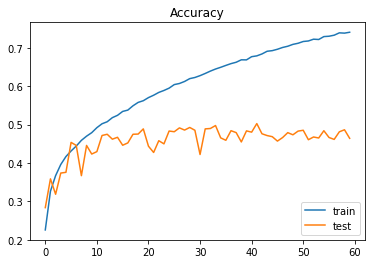

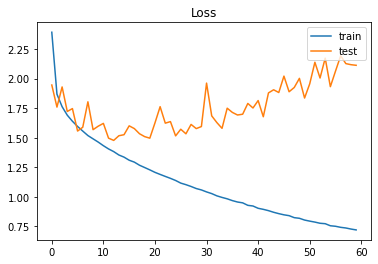

In [11]:
epochs = 20
batch_size = 256


history = dense_network.fit(
    x_train, y_train,
    epochs =  epochs, 
    batch_size= batch_size, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

all_history.append(history)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))

plot_results(all_history)

In [33]:
#Change Paramaters of hidden layers
def dense_model(inputs = 784,hidden_1=300, hidden_2=300):
  model = tf.keras.models.Sequential()
  model.add(Dense(hidden_1, input_shape=(inputs,), activation='relu'))
  model.add(Dense(hidden_2, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 300)               921900    
_________________________________________________________________
dense_31 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_32 (Dense)             (None, 10)                3010      
Total params: 1,015,210
Trainable params: 1,015,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
196/196 [==============================] - 3s 10ms/step - loss: 2.2492 - accuracy: 0.2303 - val_loss: 1.9765 - val_accuracy: 0.2800
Epoch 2/20
196/196 [==============================] - 2s 8ms/step - loss: 1.8597 - accuracy: 0.3307 - val_loss: 1.7671 - val_accuracy: 0.3507
Epoch 3/20
196/196 [==============================] - 2s 8ms/step - loss: 1.7611 - accura

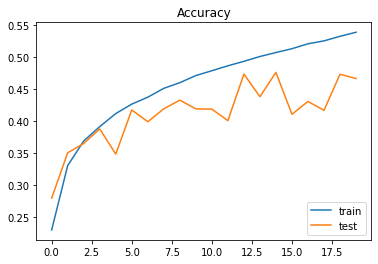

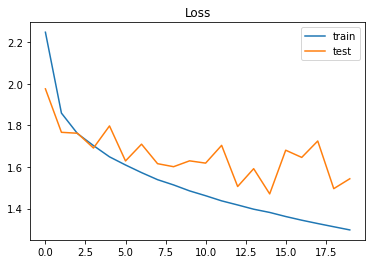

In [34]:
dense_network = dense_model(inputs = x_train.shape[1])
dense_network.summary() 
dense_network.compile(loss="categorical_crossentropy", metrics=["accuracy"])
all_history = []

epochs = 20
batch_size = 256


history = dense_network.fit(
    x_train, y_train,
    epochs =  epochs, 
    batch_size= batch_size, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

all_history.append(history)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))

plot_results(all_history)

Decreasing The Paramaers improved overfitting

In [35]:
#add One more Layer
def dense_model(inputs = 784,hidden_1=500, hidden_2 = 500 , hidden_3 =500):
  model = tf.keras.models.Sequential()
  model.add(Dense(hidden_1, input_shape=(inputs,), activation='relu'))
  model.add(Dense(hidden_2, activation='relu'))
  model.add(Dense(hidden_3,activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 500)               1536500   
_________________________________________________________________
dense_46 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_47 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_48 (Dense)             (None, 10)                5010      
Total params: 2,042,510
Trainable params: 2,042,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
196/196 [==============================] - 3s 11ms/step - loss: 2.2472 - accuracy: 0.2176 - val_loss: 2.0125 - val_accuracy: 0.2426
Epoch 2/40
196/196 [==============================] - 2s 10ms/step - loss: 1.8913 - accuracy: 0.31

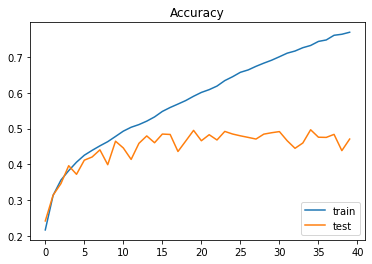

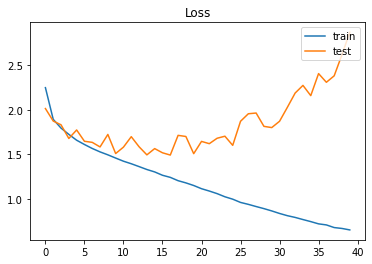

In [39]:
dense_network = dense_model(inputs = x_train.shape[1])
dense_network.summary() 
dense_network.compile(loss="categorical_crossentropy", metrics=["accuracy"])
all_history = []

#changed batch size
epochs = 40
batch_size = 256


history = dense_network.fit(
    x_train, y_train,
    epochs =  epochs, 
    batch_size= batch_size, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

all_history.append(history)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))

plot_results(all_history)

Adding a layer to the model keeps increasing the learning on the train data and start to increase loss on test data possibly keeping the layer but decreasing paramters could be good.

In [42]:
def dense_model(inputs = 784,hidden_1=500, hidden_2=500):
  model = tf.keras.models.Sequential()
  model.add(Dense(hidden_1, input_shape=(inputs,), activation='sigmoid'))
  model.add(Dense(hidden_2, activation='sigmoid'))
  model.add(Dense(10, activation='sigmoid'))
  return model

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 500)               1536500   
_________________________________________________________________
dense_53 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_54 (Dense)             (None, 10)                5010      
Total params: 1,792,010
Trainable params: 1,792,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
196/196 [==============================] - 3s 10ms/step - loss: 2.0823 - accuracy: 0.2426 - val_loss: 2.0803 - val_accuracy: 0.2151
Epoch 2/40
196/196 [==============================] - 2s 9ms/step - loss: 1.8678 - accuracy: 0.3291 - val_loss: 1.8712 - val_accuracy: 0.3192
Epoch 3/40
196/196 [==============================] - 2s 10ms/step - loss: 1.7717 - accu

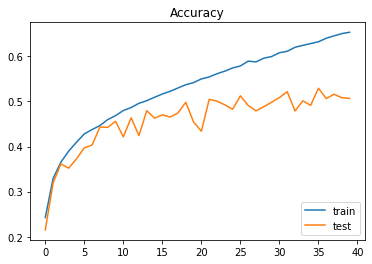

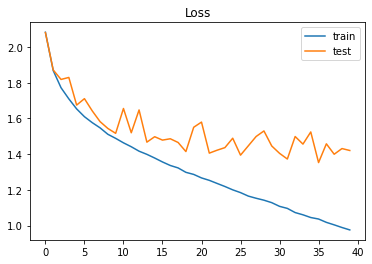

In [43]:
dense_network = dense_model(inputs = x_train.shape[1])
dense_network.summary() 
dense_network.compile(loss="categorical_crossentropy", metrics=["accuracy"])
all_history = []

epochs = 40
batch_size = 256


history = dense_network.fit(
    x_train, y_train,
    epochs =  epochs, 
    batch_size= batch_size, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

all_history.append(history)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))

plot_results(all_history)

changing Sigmoid seemed to help significantly probably due to the learning rate being to high and sigmoid function posticily impacting because of it.

In [3]:
def dense_model(inputs = 784,hidden_1=500, hidden_2=500):
  model = tf.keras.models.Sequential()
  model.add(Dense(hidden_1, input_shape=(inputs,), activation='sigmoid'))
  model.add(Dense(hidden_2, activation='sigmoid'))
  model.add(Dense(10, activation='sigmoid'))
  return model

In [ ]:
#change the learning rate
opt = tf.optimizers.Adam(learning_rate= 0.001)
dense_network = dense_model(inputs = x_train.shape[1])
dense_network.summary() 
dense_network.compile(loss="categorical_crossentropy", metrics=["accuracy"],optimizer = opt)
all_history = []

epochs = 40
batch_size = 256


history = dense_network.fit(
    x_train, y_train,
    epochs =  epochs, 
    batch_size= batch_size, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

all_history.append(history)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))

plot_results(all_history)

Changing learning rate helped significantly smoothing out learning but seems to cap at about 52%